In [1]:
# -*- encoding: utf-8 -*-
""" Application #3 - Clustering and Closest Pair of Points """

import random
import timeit
import matplotlib.pyplot as plt
import alg_cluster
import _01_Project_3 as pro3
import alg_project3_viz as pro3_viz
import alg_clusters_matplotlib

DATA_3108_URL = "http://commondatastorage.googleapis.com/codeskulptor-assets/data_clustering/unifiedCancerData_3108.csv"
DATA_896_URL = "http://commondatastorage.googleapis.com/codeskulptor-assets/data_clustering/unifiedCancerData_896.csv"
DATA_290_URL = "http://commondatastorage.googleapis.com/codeskulptor-assets/data_clustering/unifiedCancerData_290.csv"
DATA_111_URL = "http://commondatastorage.googleapis.com/codeskulptor-assets/data_clustering/unifiedCancerData_111.csv"

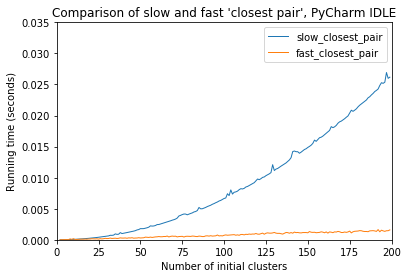

In [2]:
# I. EFFICIENCY - Questions 1 to 4 - The next four questions will consider the efficiency of hierarchical clustering and k-means clustering
def clusterize_data(data_table):
    """ Helper function for reading cancer data sets, where the fips codes don't come as cluster objects """
    clusterized = []
    for line in data_table:
        clusterized.append(alg_cluster.Cluster(set([line[0]]), line[1], line[2], line[3], line[4]))

    return clusterized


# QUESTION 1
# Write a function gen_random_clusters(num_clusters) that creates a list of clusters where each cluster in this list corresponds to one randomly generated point in the square with corners (±1,±1).
# Use this function and your favorite Python timing code to compute the running times of the functions 'slow_closest_pair' and 'fast_closest_pair' for lists of clusters of size 2 to 200.
def gen_random_clusters(num_clusters):
    cluster_list = []
    for cluster in range(num_clusters):
        cluster_list.append(alg_cluster.Cluster(set([]), random.uniform(-1, 1), random.uniform(-1, 1), 0, 0))
    return cluster_list


def run_question_1():
    total_range = 200
    plots = [(pro3.slow_closest_pair, "slow_closest_pair"), (pro3.fast_closest_pair, "fast_closest_pair")]

    for function, label_on_plot in plots:
        x = []; y = []   # we have to reinitialize the containers for both axis, otherwise everithing gets merged and the last graph will cover all of them
        for n in range(2, total_range):
            cluster_list = gen_random_clusters(n)
            x.append(n)
            start = timeit.default_timer()
            dummy_y = function(cluster_list)
            end = timeit.default_timer()
            y.append(end - start)

        plt.plot(x, y, linewidth=1, label=label_on_plot)

    plt.title("Comparison of slow and fast 'closest pair', PyCharm IDLE")
    plt.xlabel("Number of initial clusters")
    plt.ylabel("Running time (seconds)")
    plt.axis([0, total_range, 0, 0.035])
    plt.legend()
    plt.show()

run_question_1()

Loaded 3108 data points
Displaying 15 hierarchical clusters


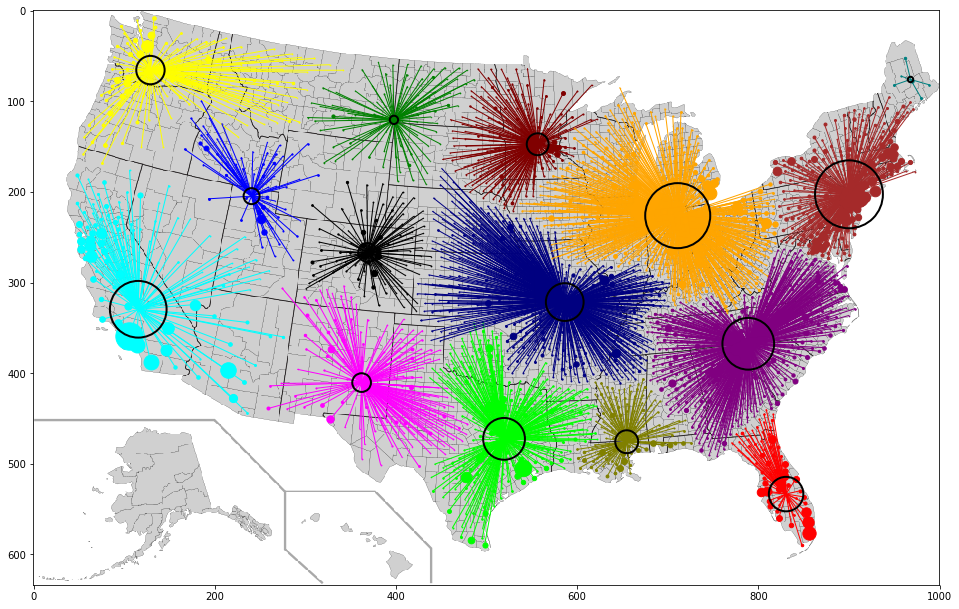

In [3]:
# QUESTION 2
# Use 'alg_project3_viz' to create an image of the 15 clusters generated by applying hierarchical clustering to the 3108 county cancer risk data set. You may submit an image with the 3108 counties colored by clusters
# or an enhanced visualization with the original counties colored by cluster and linked to the center of their corresponding clusters by lines. You can generate such an enhanced plot using our 'alg_clusters_matplotlib'
# code by modifying the last parameter of plot_clusters to be True. Note that plotting only the resulting cluster centers is not acceptable.
def run_question_2():
    data_table = pro3_viz.load_data_table(DATA_3108_URL)
    data_table_cl = clusterize_data(data_table)
    cluster_list = pro3.hierarchical_clustering(data_table_cl, 15)
    print "Displaying", len(cluster_list), "hierarchical clusters"

    # alg_clusters_matplotlib.plot_clusters(data_table, cluster_list, False)  # simple filled-in circles
    alg_clusters_matplotlib.plot_clusters(data_table, cluster_list, True)  # adds cluster centers

run_question_2()

Loaded 3108 data points
Displaying 15 k-means clusters


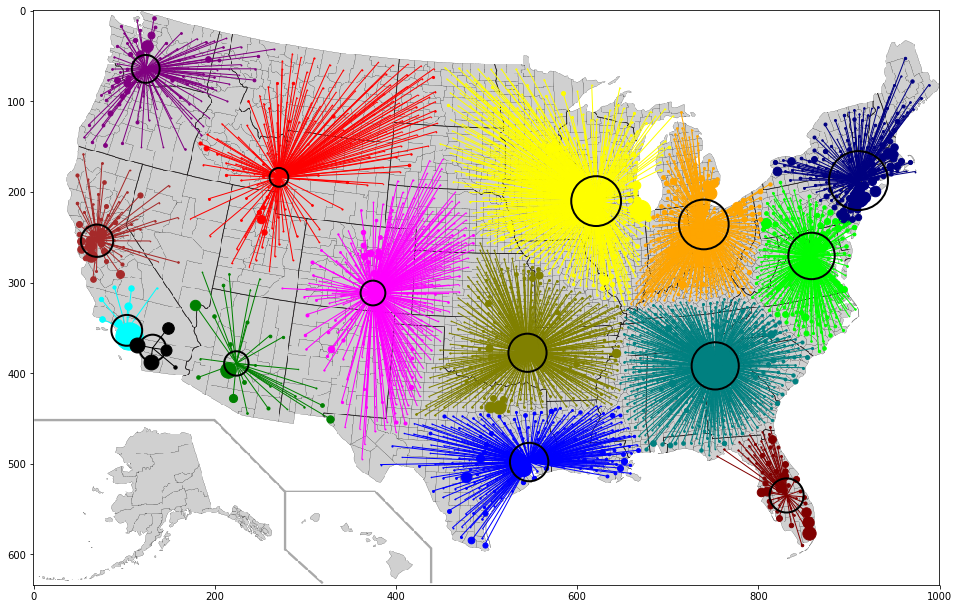

In [4]:
# QUESTION 3
# Use 'alg_project3_viz' to create an image of the 1515 clusters generated by applying 5 iterations of k-means clustering to the 3108 county cancer risk data set. You may submit an image with the 3108 counties
# colored by clusters or an enhanced visualization with the original counties colored by cluster and linked to the center of their corresponding clusters by lines. As in Project 3, the initial clusters should
# correspond to the 15 counties with the largest populations.
def run_question_3():
    data_table = pro3_viz.load_data_table(DATA_3108_URL)
    data_table_cl = clusterize_data(data_table)
    cluster_list = pro3.kmeans_clustering(data_table_cl, 15, 5)
    print "Displaying", len(cluster_list), "k-means clusters"

    # alg_clusters_matplotlib.plot_clusters(data_table, cluster_list, False)  # simple filled-in circles
    alg_clusters_matplotlib.plot_clusters(data_table, cluster_list, True)  # add cluster centers

run_question_3()

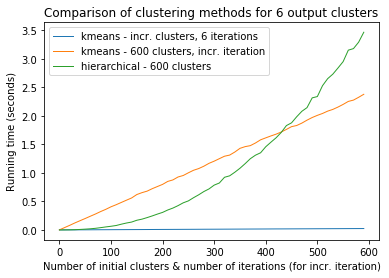

In [5]:
# QUESTION 4
# Which clustering method is faster when the number of output clusters is either a small fixed number or a small fraction of the number of input clusters? Provide a short explanation in terms of the asymptotic
# running times of both methods. You should assume that 'hierarchical_clustering' uses 'fast_closest_pair' and that k-means clustering always uses a small fixed number of iterations.
def run_question_4():
    total_range = 600  # we can manipulate the range here
    output_clusters = total_range // 100  # here we fulfill the condition that the output and number of iterations should be a small fraction of the number of input clusters
    iterations = total_range // 100
    plots = [(pro3.kmeans_clustering, "kmeans - incr. clusters, 6 iterations"), (pro3.kmeans_clustering, "kmeans - 600 clusters, incr. iteration"), (pro3.hierarchical_clustering, "hierarchical - 600 clusters")]

    for function, label_on_plot in plots:
        x = []; y = []
        for n in range(0, total_range, 10):
            cluster_list = gen_random_clusters(n)
            cluster_list_fixed = gen_random_clusters(total_range)
            x.append(n)
            if label_on_plot == "kmeans - incr. clusters, 6 iterations":  # case 1: increasing amount of clusters and fixed amount of iterations - this is the standard case
                start = timeit.default_timer()
                dummy_y = function(cluster_list, output_clusters, iterations)
                end = timeit.default_timer()
                y.append(end - start)
            elif label_on_plot == "kmeans - 600 clusters, incr. iteration":  # case 2: fixed total amount of clusters and increasing amount of iterations, just to see how the k-means clustering is growing with iterations
                start = timeit.default_timer()
                dummy_y = function(cluster_list_fixed, output_clusters, n)
                end = timeit.default_timer()
                y.append(end - start)
            else:
                start = timeit.default_timer()
                dummy_y = function(cluster_list, output_clusters)
                end = timeit.default_timer()
                y.append(end - start)

        plt.plot(x, y, linewidth=1, label=label_on_plot)

    plt.title("Comparison of clustering methods for 6 output clusters")
    plt.xlabel("Number of initial clusters & number of iterations (for incr. iteration)")
    plt.ylabel("Running time (seconds)")
    plt.legend()
    plt.show()

run_question_4()

# For small amounts of output clusters the hierarchical clustering has to perform close to n operations times O(n*log^2n), so the total running time is O(n^2*log^2n).
# K-means clustering performs somewhere between O(n) and O(n^2), so for given assumption it is going to be faster than hierarchical clustering.

Loaded 111 data points
Displaying 9 hierarchical clusters


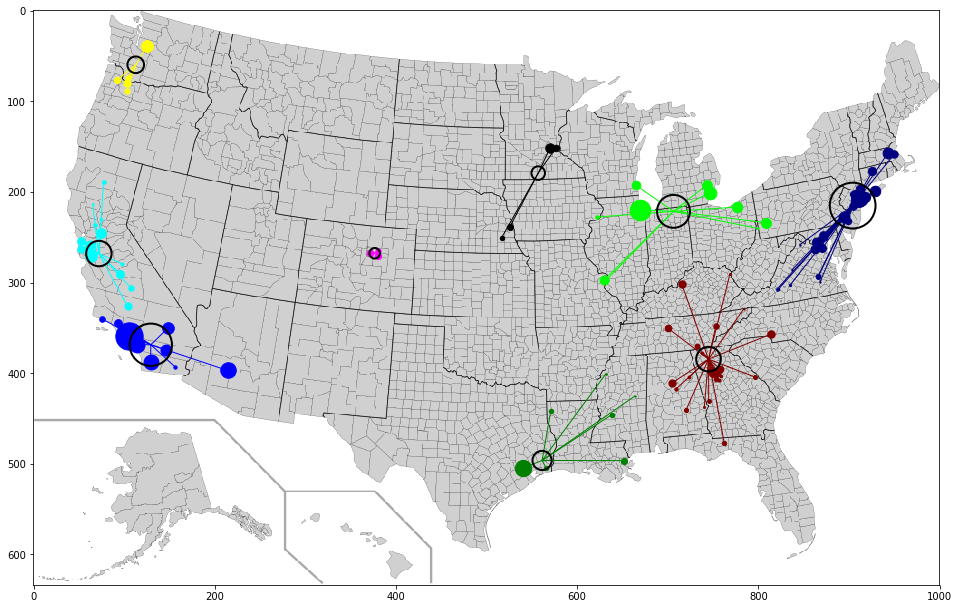

In [6]:
# II. AUTOMATION - Questions 5 to 9 - In the next five questions, we will compare the level of human supervision required for each method.

# QUESTION 5
# Use 'alg_project3_viz' to create an image of the 9 clusters generated by applying hierarchical clustering to the 111 county cancer risk data set. You may submit an image with the 111 counties colored by clusters
# or an enhanced visualization with the original counties colored by cluster and linked to the center of their corresponding clusters by lines.
def run_question_5():
    data_table = pro3_viz.load_data_table(DATA_111_URL)
    data_table_cl = clusterize_data(data_table)
    cluster_list = pro3.hierarchical_clustering(data_table_cl, 9)
    print "Displaying", len(cluster_list), "hierarchical clusters"

    # alg_clusters_matplotlib.plot_clusters(data_table, cluster_list, False)  # simple filled-in circles
    alg_clusters_matplotlib.plot_clusters(data_table, cluster_list, True)  # add cluster centers

run_question_5()

Loaded 111 data points
Displaying 9 k-means clusters


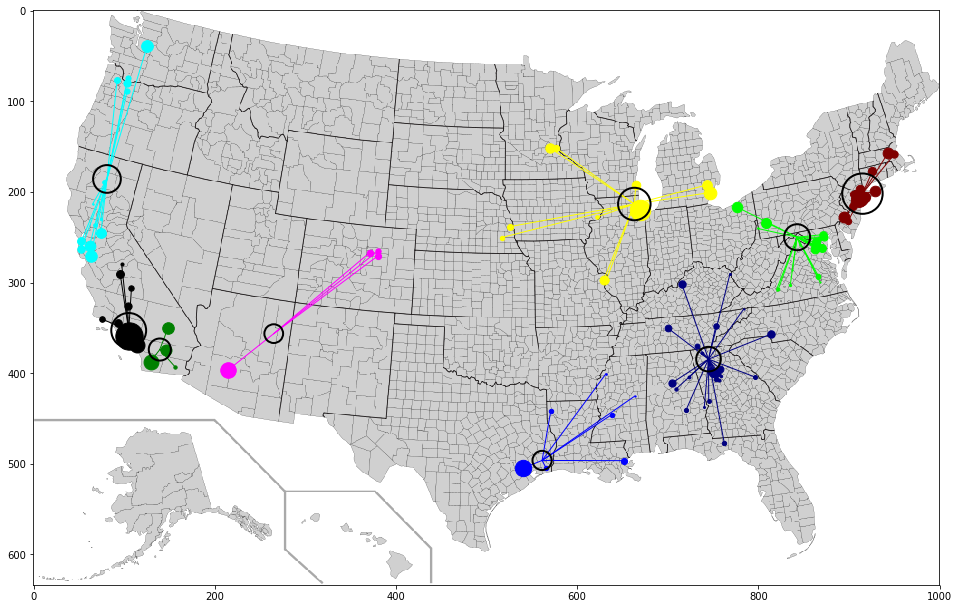

In [7]:
# QUESTION 6
# Use 'alg_project3_viz' to create an image of the 9 clusters generated by applying 5 iterations of k-means clustering to the 111 county cancer risk data set. You may submit an image with the 111 counties colored
# by clusters or an enhanced visualization with the original counties colored by cluster and linked to the center of their corresponding clusters by lines. As in Project 3, the initial clusters should correspond
# to the 9 counties with the largest populations.
def run_question_6():
    data_table = pro3_viz.load_data_table(DATA_111_URL)
    data_table_cl = clusterize_data(data_table)
    cluster_list = pro3.kmeans_clustering(data_table_cl, 9, 5)
    print "Displaying", len(cluster_list), "k-means clusters"

    # alg_clusters_matplotlib.plot_clusters(data_table, cluster_list, False)  # simple filled-in circles
    alg_clusters_matplotlib.plot_clusters(data_table, cluster_list, True)  # add cluster centers

run_question_6()

In [8]:
# QUESTION 7
# The clusterings that you computed in Questions 5 and 6 illustrate that not all clusterings are equal. In particular, some clusterings are better than others. One way to make this concept more precise is to formulate
# a mathematical measure of the error associated with a cluster. Given a cluster C, itserror is the sum of the squares of the distances from each county in the cluster to the cluster's center, weighted by
# each county's population. If pi is the position of the county and wi is its population, the cluster's error is: error(C)=∑pi∈C {wi(dpic)^2}

# Write a function 'compute_distortion(cluster_list)' that takes a list of clusters and uses 'cluster_error' to compute its distortion. Now, use 'compute_distortion' to compute the distortions of the
# two clusterings in questions 5 and 6
def compute_distortion(data_table, cluster_list):  # 'data_table' must be passed as not clustered, as cluster_error hashes the fips codes, so they can't be sets
    total_error = 0
    for cluster in cluster_list:  # cluster list is a list with clustered counties, we analyze clusters one by one
        total_error += cluster.cluster_error(data_table)  # the 'cluster_error' is an instance method, so we analyze all codes in a cluster and sum all the errors into 'total_error'
    return total_error


def run_question_7():
    data_table = pro3_viz.load_data_table(DATA_111_URL)
    data_table_cl = clusterize_data(data_table)

    hierarchical_cluster_list = pro3.hierarchical_clustering(data_table_cl, 9)
    kmeans_cluster_list = pro3.kmeans_clustering(data_table_cl, 9, 5)

    print "hierarchical clustering:", compute_distortion(data_table, hierarchical_cluster_list)  # note that 'data_table' is not clusterized
    print "k-means clustering:", compute_distortion(data_table, kmeans_cluster_list)

run_question_7()

Loaded 111 data points
hierarchical clustering: 1.75163886916e+11
k-means clustering: 2.71254226924e+11


In [9]:
# QUESTION 8
# Examine the clusterings generated in Questions 5 and 6. In particular, focus your attention on the number and shape of the clusters located on the west coast of the USA. Describe the difference between the shapes
# of the clusters produced by these two methods on the west coast of the USA. What caused one method to produce a clustering with a much higher distortion? To help you answer this question, you should consider how k-means clustering generates its initial clustering in this case.

# The k-means clustering initialisation is based on the county's population. Due to this fact, k-means clustering creates 2 clusters in southern California very close to each other, one in Los Angeles and one in San Diego.
# This forces the Washington state and Northern California to be grouped in the same cluster, causing significant distortions.


# QUESTION 9
# Based on your answer to Question 8, which method (hierarchical clustering or k-means clustering) requires less human supervision to produce clusterings with relatively low distortion?

# Hierarchical clustering requires less human supervision due to the way it gathers the points together. K-means clustering is highly dependant on the initial cluster positions which is not always obvious.

Loaded 111 data points
Loaded 290 data points
Loaded 896 data points


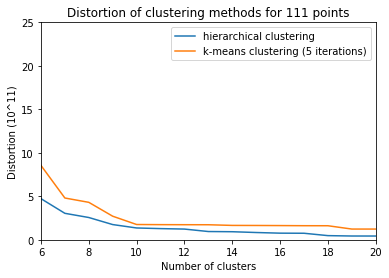

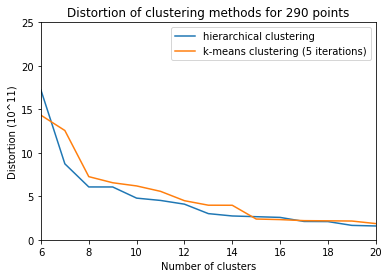

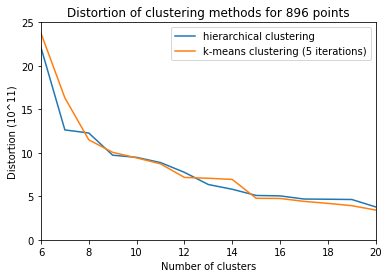

In [10]:
# III. QUALITY - Questions 10 to 11 - In the last two questions, you will analyze the quality of the clusterings produced by each method as measured by their distortion.

# QUESTION 10
# Compute the distortion of the list of clusters produced by hierarchical clustering and k-means clustering (using 5 iterations) on the 111, 290, and 896 county data sets, respectively,
# where the number of output clusters ranges from 6 to 20 (inclusive). Important note: To compute the distortion for all 15 output clusterings produced by hierarchical_clustering, you should remember that you can use
# the hierarchical cluster of size 20 to compute the hierarchical clustering of size 19 and so on. Otherwise, you will introduce an unnecessary factor of 1515 into the computation of the 15 hierarchical clusterings.

# Once you have computed these distortions for both clustering methods, create three separate plots (one for each data set) that compare the distortion of the clusterings produced by both methods.
# Each plot should include two curves drawn as line plots. The horizontal axis for each plot should indicate the number of output clusters while the vertical axis should indicate the distortion associated
# with each output clustering. For each plot, include a title that indicates the data set used in creating the plots and a legend that distinguishes the two curves.
def run_question_10():
    data_tables = [pro3_viz.load_data_table(DATA_111_URL), pro3_viz.load_data_table(DATA_290_URL), pro3_viz.load_data_table(DATA_896_URL)]

    for data_table in data_tables:  # for each cancer data set we do the following:
        data_table_cl = clusterize_data(data_table)
        x = []
        h_dist = []
        k_dist = []
        for num_of_clusters in range(6, 21):
            hierarchical_cluster_list = pro3.hierarchical_clustering(data_table_cl, num_of_clusters)  # this where we increase the number of clusters for both methods
            kmeans_cluster_list = pro3.kmeans_clustering(data_table_cl, num_of_clusters, 5)
            x.append(num_of_clusters)
            h_dist.append(compute_distortion(data_table, hierarchical_cluster_list) / 10**11)  # note that 'data_table' is not clusterized
            k_dist.append(compute_distortion(data_table, kmeans_cluster_list) / 10**11)

        plt.title("Distortion of clustering methods for " + str(len(data_table_cl)) + " points")
        plt.xlabel("Number of clusters")
        plt.ylabel("Distortion (10^11)")
        plt.plot(x, h_dist, label='hierarchical clustering')
        plt.plot(x, k_dist, label='k-means clustering (5 iterations)')
        plt.axis([6, 20, 0, 25])
        plt.legend()
        plt.show()

run_question_10()

In [11]:
# QUESTION 11
# For each data set (111, 290, and 896 counties), does one clustering method consistently produce lower distortion clusterings when the number of output clusters is in the range 6 to 20?
# If so, indicate on which data set(s) one method is superior to the other.

# For the smallest dataset of 111 points the hierarchical clustering provides slightly better results. For other datasets none of the methods produces better results in therms of distortion.
